<a href="https://colab.research.google.com/github/iqra-creator/DEN/blob/main/Task%205.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

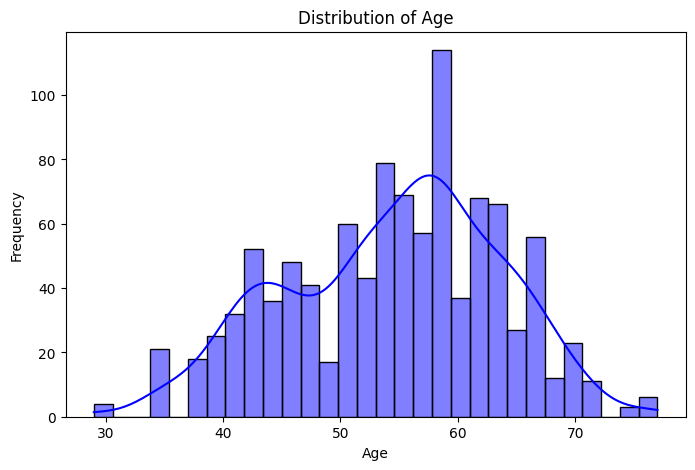

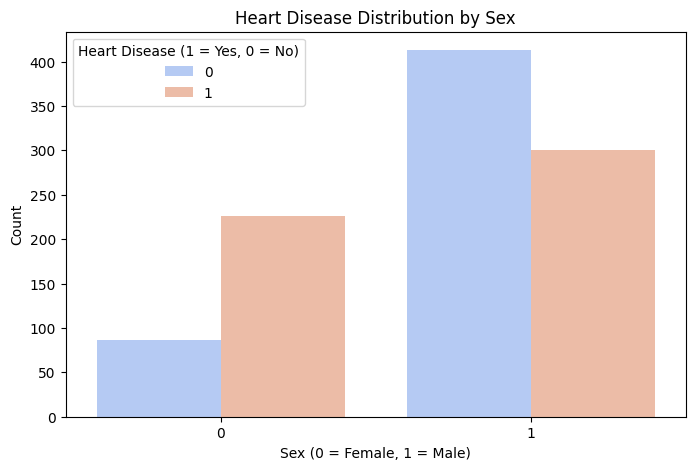

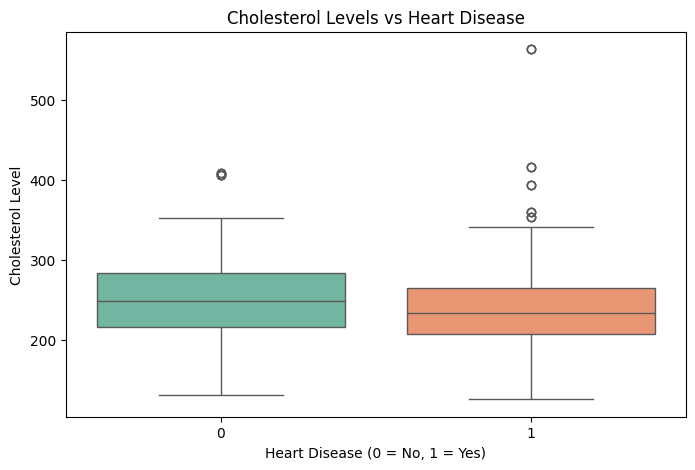

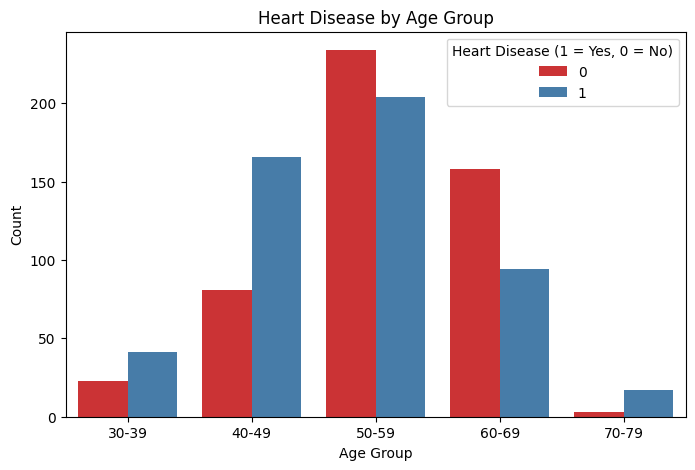

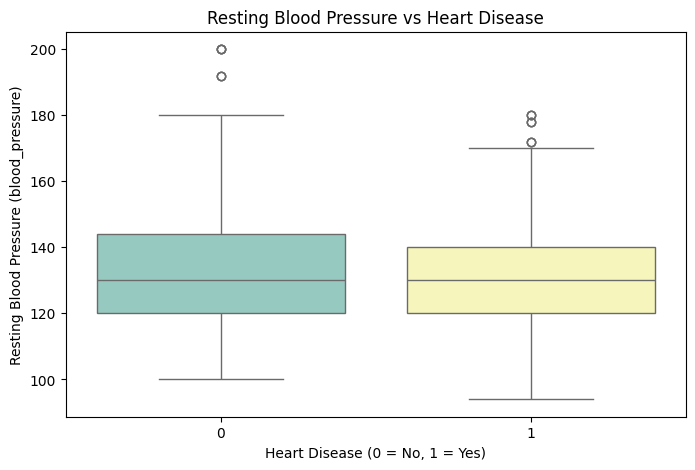

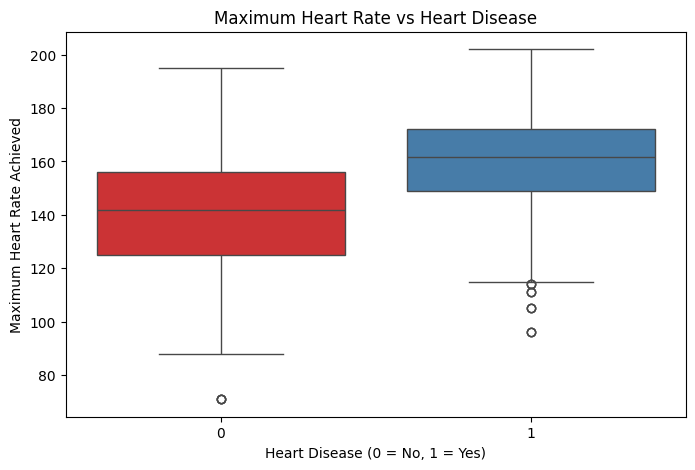

Logistic Regression Accuracy: 0.8048780487804879

Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.72      0.78       102
           1       0.76      0.89      0.82       103

    accuracy                           0.80       205
   macro avg       0.81      0.80      0.80       205
weighted avg       0.81      0.80      0.80       205


Confusion Matrix for Logistic Regression:
 [[73 29]
 [11 92]]

Decision Tree Accuracy: 0.9853658536585366

Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205


Confusion Matrix for Decision Tree:
 [[102   0]
 [  3 100]]
Prediction for the new patient: Heart Disease

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import warnings
import pickle

warnings.filterwarnings("ignore")

data = pd.read_csv('/content/heart.csv')

# Data Preprocessing
# print(data.isnull().sum())

# print(data.describe())

# Step 1: Exploratory Data Analysis (EDA)

# Distribution of Age
plt.figure(figsize=(8, 5))
sns.histplot(data['age'], kde=True, color='blue', bins=30)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Heart Disease distribution by Sex
plt.figure(figsize=(8, 5))
sns.countplot(x='sex', hue='heart_disease', data=data, palette='coolwarm')
plt.title('Heart Disease Distribution by Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.ylabel('Count')
plt.legend(title='Heart Disease (1 = Yes, 0 = No)')
plt.show()

# Cholesterol Levels vs Heart Disease
plt.figure(figsize=(8, 5))
sns.boxplot(x='heart_disease', y='cholesterol', data=data, hue='heart_disease', palette='Set2', legend=False)
plt.title('Cholesterol Levels vs Heart Disease')
plt.xlabel('Heart Disease (0 = No, 1 = Yes)')
plt.ylabel('Cholesterol Level')
plt.show()

# Heart Disease by Age Group
plt.figure(figsize=(8, 5))
age_bins = [29, 40, 50, 60, 70, 80]  # Defining age groups
data['age_group'] = pd.cut(data['age'], bins=age_bins, labels=['30-39', '40-49', '50-59', '60-69', '70-79'])
sns.countplot(x='age_group', hue='heart_disease', data=data, palette='Set1')
plt.title('Heart Disease by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Heart Disease (1 = Yes, 0 = No)')
plt.show()

# Heart Disease distribution by Blood Pressure
plt.figure(figsize=(8, 5))
sns.boxplot(x='heart_disease', y='blood_pressure', data=data, hue='heart_disease', palette='Set3', legend=False)
plt.title('Resting Blood Pressure vs Heart Disease')
plt.xlabel('Heart Disease (0 = No, 1 = Yes)')
plt.ylabel('Resting Blood Pressure (blood_pressure)')
plt.show()

# Maximum Heart Rate (thalach) vs Heart Disease
plt.figure(figsize=(8, 5))
sns.boxplot(x='heart_disease', y='thalach', data=data, hue='heart_disease', palette='Set1', legend=False)
plt.title('Maximum Heart Rate vs Heart Disease')
plt.xlabel('Heart Disease (0 = No, 1 = Yes)')
plt.ylabel('Maximum Heart Rate Achieved')
plt.show()

# Step 2: Feature Engineering and selection

data['chol_age_interaction'] = data['cholesterol'] * data['age']
data['bp_chol_interaction'] = data['blood_pressure'] * data['cholesterol']

# Define feature columns
X = data.drop(['heart_disease', 'age_group'], axis=1)
y = data['heart_disease']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Data Normalization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 4: Model Training

# Logistic Regression Model
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_scaled, y_train)
y_pred_logreg = log_reg.predict(X_test_scaled)

# Decision Tree Classifier Model
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)
y_pred_tree = tree_clf.predict(X_test)

# Step 5: Model Evaluation

# Logistic Regression Performance
logreg_accuracy = accuracy_score(y_test, y_pred_logreg)
logreg_classification_report = classification_report(y_test, y_pred_logreg)

# Decision Tree Performance
tree_accuracy = accuracy_score(y_test, y_pred_tree)
tree_classification_report = classification_report(y_test, y_pred_tree)

# Confusion Matrices
logreg_conf_matrix = confusion_matrix(y_test, y_pred_logreg)
tree_conf_matrix = confusion_matrix(y_test, y_pred_tree)

# Print evaluation results
print("Logistic Regression Accuracy:", logreg_accuracy)
print("\nLogistic Regression Classification Report:\n", logreg_classification_report)
print("\nConfusion Matrix for Logistic Regression:\n", logreg_conf_matrix)

print("\nDecision Tree Accuracy:", tree_accuracy)
print("\nDecision Tree Classification Report:\n", tree_classification_report)
print("\nConfusion Matrix for Decision Tree:\n", tree_conf_matrix)

# Step 6: Implementing the Model for Practical Healthcare Applications

# Save the Logistic Regression model for future use
with open('logistic_regression_model.pkl', 'wb') as f:
    pickle.dump(log_reg, f)

# Save the Decision Tree model for future use
with open('decision_tree_model.pkl', 'wb') as f:
    pickle.dump(tree_clf, f)

# Simulating Prediction for New Patient Data

new_patient_data = {
    'age': 55,
    'sex': 1,  # Male
    'cp': 3,
    'blood_pressure': 130,
    'cholesterol': 250,
    'fbs': 0,
    'restecg': 0,
    'thalach': 170,  # Max heart rate
    'exang': 0,
    'oldpeak': 3.0,
    'slope': 2,
    'ca': 0,
    'thal': 3,

    'chol_age_interaction': 55 * 250,
    'bp_chol_interaction': 130 * 250

}

# Convert new patient data to a DataFrame and scale it
new_patient_df = pd.DataFrame([new_patient_data])
new_patient_scaled = scaler.transform(new_patient_df)

# Predict heart disease using the Logistic Regression model
new_patient_prediction = log_reg.predict(new_patient_scaled)
prediction_result = "Heart Disease" if new_patient_prediction[0] == 1 else "No Heart Disease"

print(f"Prediction for the new patient: {prediction_result}")
